In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost
import matplotlib.colors as colors

In [2]:
tracks = pd.read_csv('./data/DS_2_train_ex_chi2_1p5_3dr.gz', index_col=0, compression='gzip')
tracks.head()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,event_id,X,Y,Z,TX,TY,chi2,signal,brick_number,X_n,...,Bwd2_chi2,Bwd2_s_chi2,Bwd3_n,Bwd3_dTX,Bwd3_dTY,Bwd3_sTX,Bwd3_sTY,Bwd3_chi2,Bwd3_s_chi2,n_brick_tracks
0,-999,48777.812500,5972.550781,38790.0,-0.043452,-0.474502,1.608696,0.0,5,-1231.533203,...,1.026934,0.335789,157.0,0.054306,0.429183,0.299080,0.376236,0.905233,0.353048,97615
1,-999,33483.261719,71849.406250,50427.0,0.265234,0.297731,1.772223,0.0,5,-16526.083984,...,1.005834,0.304894,143.0,-0.230033,-0.364507,0.298327,0.353625,0.987749,0.333917,97615
2,-999,29653.648438,69408.585938,67236.0,0.399135,0.300521,1.964649,0.0,5,-20355.697266,...,0.978975,0.437963,94.0,-0.386943,-0.296950,0.276832,0.365546,0.874008,0.393713,97615
3,-999,49400.609375,54426.628906,56892.0,0.402344,0.018006,1.496650,0.0,5,-608.736328,...,0.901971,0.434794,329.0,-0.428369,-0.002087,0.256135,0.316261,0.865775,0.368821,97615
4,-999,30704.101562,9301.242188,14223.0,0.065262,0.225186,2.438179,0.0,5,-19305.244141,...,1.001391,0.340346,132.0,-0.030410,-0.230372,0.303352,0.387498,1.018097,0.331374,97615


In [3]:
x_min = np.min(tracks["X"])
x_max = np.max(tracks["X"])
x_middle = (x_max + x_min)/2
y_min = np.min(tracks["Y"])
y_max = np.max(tracks["Y"])
y_middle = (y_max + y_min)/2
z_min = np.min(tracks["Z"])
z_max = np.max(tracks["Z"])
z_middle = (z_max + z_min)/2
print("X[{}, {}]".format(x_min, x_max))
print("Y[{}, {}]".format(y_min, y_max))
print("Z[{}, {}]".format(z_min, z_max))

X[27762.7578125, 72240.3359375]
Y[3313.84375, 76710.2421875]
Z[0.0, 72408.0]


In [7]:
#tr = tracks
tr = tracks[(tracks["event_id"] ==35130)]
#tr = tracks[(tracks["event_id"] ==35130)]
x = tr["X"] - x_middle
y = tr["Y"] - y_middle
z = tr["Z"]
r = np.sqrt(x**2 + y**2)
phi = np.arctan2(y, x)
tx = tr["TX"]
ty = tr["TY"]
chi2 = tr["chi2"]

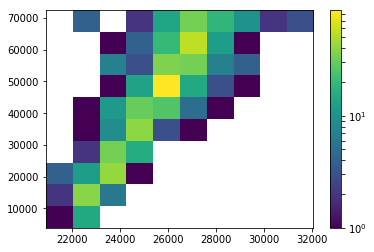

In [8]:
plt.hist2d(r, z, norm=colors.LogNorm());
plt.colorbar();
plt.show()

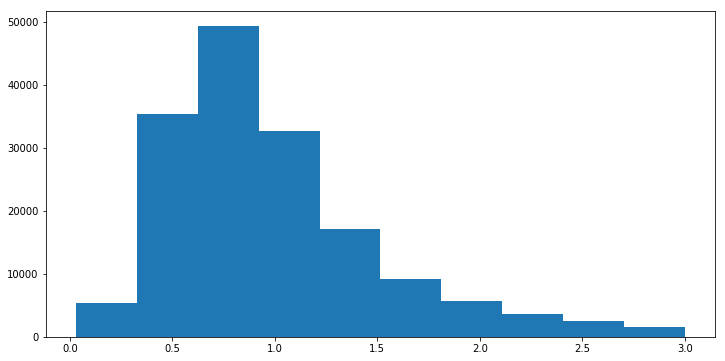

In [30]:
plt.hist(tracks[tracks['event_id'] != -999]['chi2']);
plt.show()

In [11]:
tracks_1 = tracks[tracks['brick_number'] == 1]

In [25]:
%pylab inline
def plot_sgn_vs_bkg(params):
    n_params = len(params)
    pylab.rcParams['figure.figsize'] = (12, 4*n_params)
    n=1
    for param in params:
        plt.subplot(n_params, 2, n)
        plt.hist(tracks_1[tracks_1['event_id'] != -999][param]);
        plt.subplot(n_params, 2, n+1)
        plt.hist(tracks_1[tracks_1['event_id'] == -999][param]);
        n += 2
    #plt.set_yscale('log')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


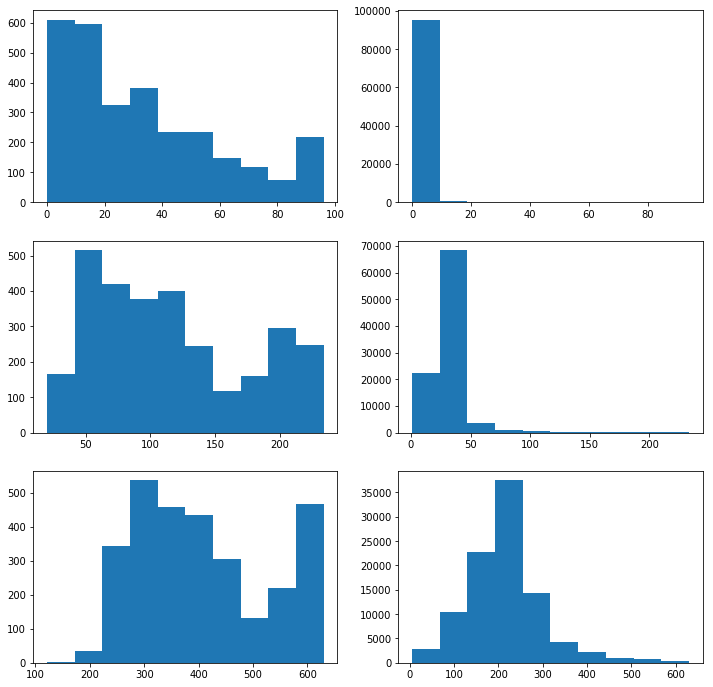

In [26]:
plot_sgn_vs_bkg(['Bwd1_n', 'Bwd2_n', 'Bwd3_n'])

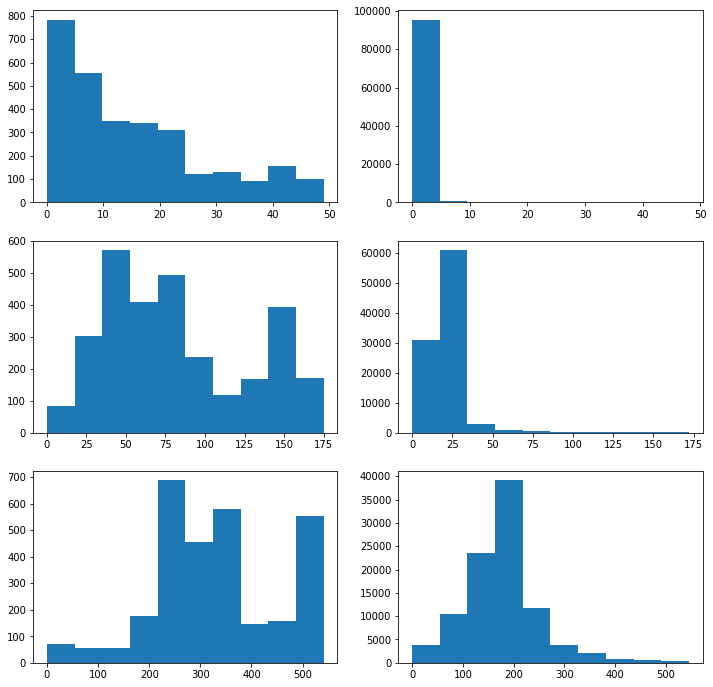

In [27]:
plot_sgn_vs_bkg(['Fwd1_n', 'Fwd2_n', 'Fwd3_n'])

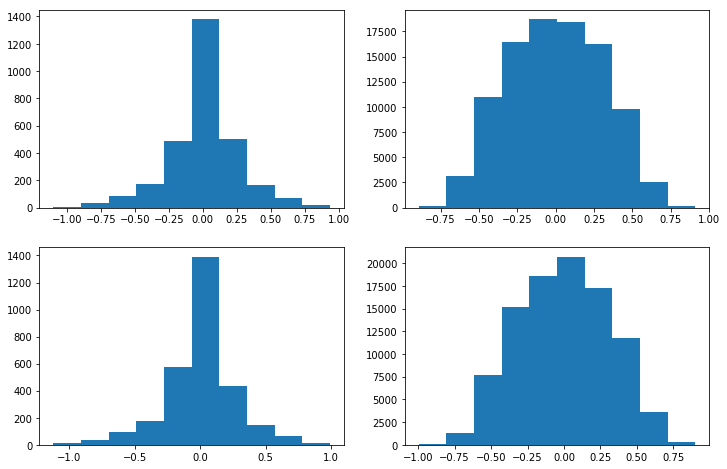

In [32]:
plot_sgn_vs_bkg(['Bwd2_dTX', 'Fwd2_dTX'])

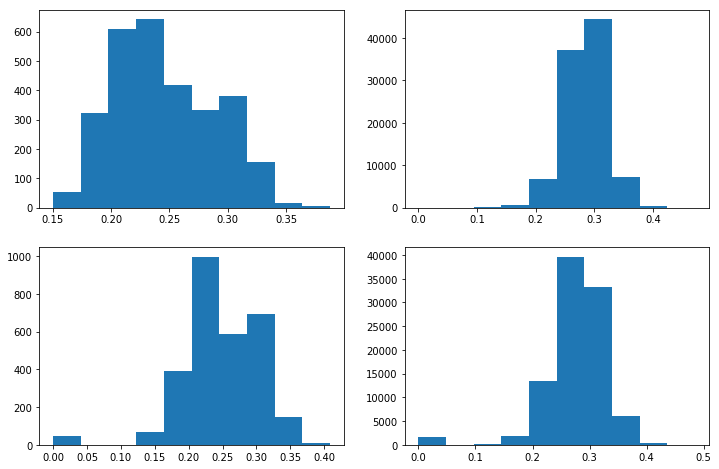

In [33]:
plot_sgn_vs_bkg(['Bwd2_sTX', 'Fwd2_sTX'])

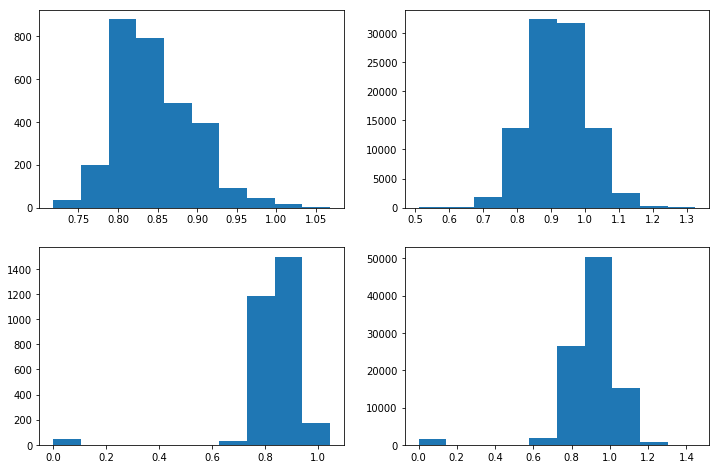

In [35]:
plot_sgn_vs_bkg(['Bwd2_chi2', 'Fwd2_chi2'])